### adult_data test

In [31]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score , recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
import warnings
import time

warnings.filterwarnings('ignore')
%matplotlib inline

adult_df = pd.read_csv('./adult2.data_converted.csv')
adult_df.head(5)                       

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_than_50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [32]:
adult_df.drop(['marital-status', 'occupation', 'relationship'], axis=1, inplace=True)

In [33]:
adult_df_dropna = adult_df

In [34]:
adult_df_dropna.isnull().sum()

age                 0
work-class          0
fnlwgt              0
education           0
education-num       0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
is_more_than_50K    0
dtype: int64

In [35]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = adult_df_dropna.columns
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

adult_df_dropna = encode_features(adult_df_dropna)
adult_df_dropna.head()

,age,work-class,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,is_more_than_50K
0,22,7,2671,9,12,4,1,25,0,39,39,0
1,33,6,2926,9,12,4,1,0,0,12,39,0
2,21,4,14086,11,8,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,0,0,0,39,5,0


In [36]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
y_adult_df = adult_df_dropna['is_more_than_50K']
X_adult_df= adult_df_dropna.drop('is_more_than_50K',axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_adult_df, y_adult_df, \
                                                   test_size=0.2, random_state=12)

In [38]:
dt_clf = DecisionTreeClassifier(random_state=12)
rf_clf = RandomForestClassifier(random_state=12)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test, lr_pred)))


DecisionTreeClassifier 정확도 : 0.7827
RandomForestClassifier 정확도 : 0.8300
LogisticRegression 정확도 : 0.7806


In [39]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_adult_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_adult_df.values[train_index], X_adult_df.values[test_index]
        y_train, y_test = y_adult_df.values[train_index], y_adult_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print('평균 정확도 : {0:.4f}'.format(mean_score))

# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차검증 0 정확도 : 0.7846
교차검증 1 정확도 : 0.7767
교차검증 2 정확도 : 0.7859
교차검증 3 정확도 : 0.7855
교차검증 4 정확도 : 0.7803
평균 정확도 : 0.7826


In [40]:
from sklearn.model_selection import cross_val_score

# cross_val_score() 함수로 폴드 세트추출, 학습/예측, 평가를 한번에 수행
scores = cross_val_score(dt_clf, X_adult_df, y_adult_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('교차검증 {0} 정확도 {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))


교차검증 0 정확도 0.7849
교차검증 1 정확도 0.7778
교차검증 2 정확도 0.7850
교차검증 3 정확도 0.7835
교차검증 4 정확도 0.7812
평균 정확도 : 0.7825


In [41]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8393
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8419


### 오차행렬

In [42]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [43]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
adult_df = pd.read_csv('./adult2.data_converted.csv')
y_adult_df = adult_df_dropna['is_more_than_50K']
X_adult_df= adult_df_dropna.drop('is_more_than_50K', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X_adult_df, y_adult_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

오차 행렬
[[4720  295]
 [1036  462]]
정확도: 0.7956, 정밀도: 0.6103, 재현율: 0.3084


In [44]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (6513, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.62320679 0.37679321]
 [0.82820022 0.17179978]
 [0.85070226 0.14929774]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.62320679 0.37679321 0.        ]
 [0.82820022 0.17179978 0.        ]
 [0.85070226 0.14929774 0.        ]]


In [45]:
# Binarizer - 0과1을 리턴
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [46]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차 행렬
[[4720  295]
 [1036  462]]
정확도: 0.7956, 정밀도: 0.6103, 재현율: 0.3084


In [47]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[4523  492]
 [ 933  565]]
정확도: 0.7812, 정밀도: 0.5345, 재현율: 0.3772


In [48]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[4523  492]
 [ 933  565]]
정확도: 0.7812, 정밀도: 0.5345, 재현율: 0.3772
임곗값: 0.45
오차 행렬
[[4645  370]
 [ 988  510]]
정확도: 0.7915, 정밀도: 0.5795, 재현율: 0.3405
임곗값: 0.5
오차 행렬
[[4720  295]
 [1036  462]]
정확도: 0.7956, 정밀도: 0.6103, 재현율: 0.3084
임곗값: 0.55
오차 행렬
[[4785  230]
 [1080  418]]
정확도: 0.7989, 정밀도: 0.6451, 재현율: 0.2790
임곗값: 0.6
오차 행렬
[[4838  177]
 [1113  385]]
정확도: 0.8019, 정밀도: 0.6851, 재현율: 0.2570


In [49]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)

print("thresholds 5 sample:", thresholds[:5])
print("precisions 5 sample:", precisions[:5])
print("recalls 5 sample:", recalls[:5])

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (6411,)
반환된 precisions 배열의 Shape: (6412,)
반환된 recalls 배열의 Shape: (6412,)
thresholds 5 sample: [0.06369499 0.06375223 0.06380792 0.06382897 0.06392922]
precisions 5 sample: [0.23333333 0.2332139  0.23325023 0.23328658 0.23332294]
recalls 5 sample: [1.         0.99933244 0.99933244 0.99933244 0.99933244]
샘플 추출을 위한 임계값 배열의 index 10개: [   0   15   30   45   60   75   90  105  120  135  150  165  180  195
  210  225  240  255  270  285  300  315  330  345  360  375  390  405
  420  435  450  465  480  495  510  525  540  555  570  585  600  615
  630  645  660  675  690  705  720  735  750  765  780  795  810  825
  840  855  870  885  900  915  930  945  960  975  990 1005 1020 1035
 1050 1065 1080 1095 1110 1125 1140 1155 1170 1185 1200 1215 1230 1245
 1260 1275 1290 1305 1320 1335 1350 1365 1380 1395 1410 1425 1440 1455
 1470 1485 1500 1515 1530 1545 1560 1575 1590 1605 1620 1635 1650 1665
 1680 1695 1710 1725 1740 1755 1770 1785 1800 1815 1830 1845 1860 1875
 18

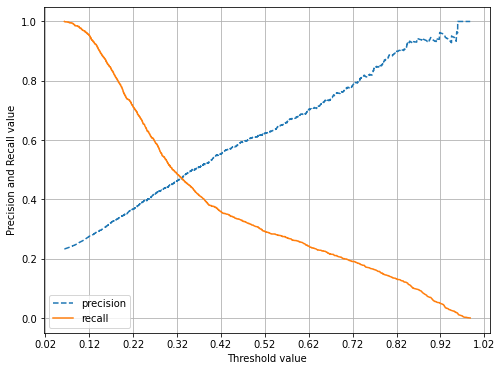

In [50]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

## ROC CURVE & AUC

In [51]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [   1    6   11   16   21   26   31   36   41   46   51   56   61   66
   71   76   81   86   91   96  101  106  111  116  121  126  131  136
  141  146  151  156  161  166  171  176  181  186  191  196  201  206
  211  216  221  226  231  236  241  246  251  256  261  266  271  276
  281  286  291  296  301  306  311  316  321  326  331  336  341  346
  351  356  361  366  371  376  381  386  391  396  401  406  411  416
  421  426  431  436  441  446  451  456  461  466  471  476  481  486
  491  496  501  506  511  516  521  526  531  536  541  546  551  556
  561  566  571  576  581  586  591  596  601  606  611  616  621  626
  631  636  641  646  651  656  661  666  671  676  681  686  691  696
  701  706  711  716  721  726  731  736  741  746  751  756  761  766
  771  776  781  786  791  796  801  806  811  816  821  826  831  836
  841  846  851  856  861  866  871  876  881  886  891  896  901  906
  911  916  921  926  931  936  941  946  951  956  

In [52]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
print('max predict_proba:', np.max(pred_proba_class1))

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
print('thresholds[0]:', thresholds[0])
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

max predict_proba: 0.9876373973239286
thresholds[0]: 1.9876373973239287
샘플 추출을 위한 임곗값 배열의 index 10개: [   0    5   10   15   20   25   30   35   40   45   50   55   60   65
   70   75   80   85   90   95  100  105  110  115  120  125  130  135
  140  145  150  155  160  165  170  175  180  185  190  195  200  205
  210  215  220  225  230  235  240  245  250  255  260  265  270  275
  280  285  290  295  300  305  310  315  320  325  330  335  340  345
  350  355  360  365  370  375  380  385  390  395  400  405  410  415
  420  425  430  435  440  445  450  455  460  465  470  475  480  485
  490  495  500  505  510  515  520  525  530  535  540  545  550  555
  560  565  570  575  580  585  590  595  600  605  610  615  620  625
  630  635  640  645  650  655  660  665  670  675  680  685  690  695
  700  705  710  715  720  725  730  735  740  745  750  755  760  765
  770  775  780  785  790  795  800  805  810  815  820  825  830  835
  840  845  850  855  860  865  870  875  880  

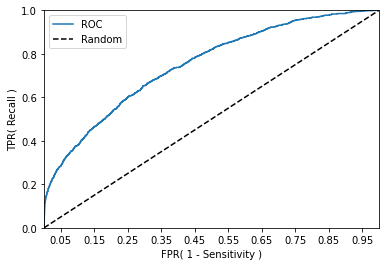

In [53]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [54]:
from sklearn.metrics import roc_auc_score

#pred = lr_clf.predict(X_test)
#roc_score = roc_auc_score(y_test, pred)

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.7490
